In [28]:
from PyJEM import detectorext
from PyJEM import eds

import PyJEM
PyJEM.__version__

import numpy as np
import matplotlib.pyplot as plt

In [6]:
# 検出器の選択
detectorext.function.assign_channel('HAADF', 1)

{'status': 'OK'}

In [18]:
# アノテーション配置する
args = {'LUTScanSetting': {'LookUpTable': '[]',
  'Shape': 2,#Line
  'Position': [[-0.5, -0.5], [0.5, 0.5]],
  'PixelResolution': 2,
  'IgnorePixelCount': 0,
  'BlankingCount': 0}}

detectorext.set_LUTscansetting(args)

{'status': 'OK'}

In [19]:
# EDS の各種パラメタ設定
args2 = {'ProcessTime': ['T1', None, None, None],
 'DwellTime': 4700.0,
 'CollectionMode': 3,
 'SweepCount': 1,
 'EnableScanSync': False,
 'EDSSelected': True}

eds.set_acquisition_settings(args2)

{'ProcessTime': ['T1', None, None, None],
 'DwellTime': 4700.0,
 'CollectionMode': 3,
 'SweepCount': 1,
 'EnableScanSync': False,
 'EDSSelected': True}

In [20]:
# スタート
data_id = eds.start_acquisition()
data_id

{'Version': '08', 'DataID': '7498587e-cfbd-43a9-9ed4-79b3f7b9117d'}

## get_spectrum_data

In [25]:
# get spectrum data
binary_spectrum_data = eds.get_multiple_spectrum_data({"TargetDataID" : data_id["DataID"]})

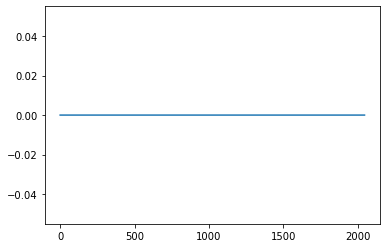

In [31]:
def to_graph(binary):
    # Divide binary data into 4-byte units
    binary_intensity_list = [binary[i:i+4] for i in range(0, len(binary), 4)]

    # バイナリデータをintegerに変換する
    intnum = []
    for intensity in binary_intensity_list:
        intnum.append( int.from_bytes(intensity, byteorder="little"))

    data = np.array_split(intnum, len(intnum) / 2048)
    ans = data[0] # 適当に初期化
    len(data)
    
    # 全部足したらEDS Whole Spectrumと一致
    for i in range(0, len(data)):
        ans = ans + data[i]
        
    # EDS Whole Spectrumと一致する
    %matplotlib inline
    plt.plot(intnum)
    
to_graph(binary_spectrum_data)